In [130]:
import pandas as pd

from statsmodels.stats.outliers_influence import variance_inflation_factor

data = pd.read_csv('Influencer.csv')
print(data.head())


   Rank   Channel Info  Influence Score Followers Avg. Likes Posts   
0     1    \ncristiano               92    485.2m       8.7m  3.4k  \
1     2    kyliejenner               91    370.7m       8.2m  7.0k   
2     3     \nleomessi               90    363.9m       6.7m   915   
3     4  \nselenagomez               93    348.8m       6.1m  1.9k   
4     5      \ntherock               91    339.4m       1.8m  6.8k   

   60-Day Eng Rate New Post Avg. Likes Total Likes Country Or Region  
0            0.013                6.3m       29.1b             Spain  
1            0.014                5.0m       57.4b     United States  
2            0.010                3.5m        6.1b               NaN  
3            0.005                1.7m       11.4b     United States  
4            0.003              932.0k       12.6b     United States  


In [131]:
print(data.shape)

(200, 10)


In [132]:
# Remove column name 'Channel Info' , 'Country Or Region'
## data = data.drop(['Channel Info' , 'Country Or Region'], axis=1)
# data = data.drop(['Channel Info'], axis=1)
## data = data.drop(['Country Or Region'], axis=1)
print(data.head())

   Rank   Channel Info  Influence Score Followers Avg. Likes Posts   
0     1    \ncristiano               92    485.2m       8.7m  3.4k  \
1     2    kyliejenner               91    370.7m       8.2m  7.0k   
2     3     \nleomessi               90    363.9m       6.7m   915   
3     4  \nselenagomez               93    348.8m       6.1m  1.9k   
4     5      \ntherock               91    339.4m       1.8m  6.8k   

   60-Day Eng Rate New Post Avg. Likes Total Likes Country Or Region  
0            0.013                6.3m       29.1b             Spain  
1            0.014                5.0m       57.4b     United States  
2            0.010                3.5m        6.1b               NaN  
3            0.005                1.7m       11.4b     United States  
4            0.003              932.0k       12.6b     United States  


In [133]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'k' in x:
        if len(x) > 1:
            return float(x.replace('k', '')) * 1000
        return 1000.0
    if 'm' in x:
        if len(x) > 1:
            return float(x.replace('m', '')) * 1000000
        return 1000000.0
    if 'b' in x:
        return float(x.replace('b', '')) * 1000000000
    return 0.0


In [134]:
data['Followers'] = data['Followers'].apply(value_to_float)

In [135]:
data['Avg. Likes'] = data['Avg. Likes'].apply(value_to_float)

In [136]:
data['Posts'] = data['Posts'].apply(value_to_float)

In [137]:
data['New Post Avg. Likes'] = data['New Post Avg. Likes'].apply(value_to_float)

In [138]:
data['Total Likes'] = data['Total Likes'].apply(value_to_float)

In [139]:
print(data.head())

   Rank   Channel Info  Influence Score    Followers  Avg. Likes   Posts   
0     1    \ncristiano               92  485200000.0   8700000.0  3400.0  \
1     2    kyliejenner               91  370700000.0   8200000.0  7000.0   
2     3     \nleomessi               90  363900000.0   6700000.0     0.0   
3     4  \nselenagomez               93  348800000.0   6100000.0  1900.0   
4     5      \ntherock               91  339400000.0   1800000.0  6800.0   

   60-Day Eng Rate  New Post Avg. Likes   Total Likes Country Or Region  
0            0.013            6300000.0  2.910000e+10             Spain  
1            0.014            5000000.0  5.740000e+10     United States  
2            0.010            3500000.0  6.100000e+09               NaN  
3            0.005            1700000.0  1.140000e+10     United States  
4            0.003             932000.0  1.260000e+10     United States  


In [140]:
# data['Gender'] = data['Gender'].map({'Male':0, 'Female':1})

X = data[['Rank', 'Influence Score', 'Followers' , 'Avg. Likes' , 'Posts', 'New Post Avg. Likes', 'Total Likes']]

X = data[['60-Day Eng Rate' , 'Rank', 'Influence Score']]

## Are there any correlated features in the given dataset? 
## If yes, state the correlation coefficient of the pair of features which are highly correlated.

In [141]:

X = data[['Rank', 'Influence Score', 'Followers' , 'Avg. Likes' , 'Posts', 'New Post Avg. Likes', 'Total Likes']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

               feature        VIF
0                 Rank   6.588899
1      Influence Score  14.999564
2            Followers   6.479863
3           Avg. Likes   9.646810
4                Posts   2.721247
5  New Post Avg. Likes   7.663706
6          Total Likes   3.194180


In [142]:
print(X.columns)

Index(['Rank', 'Influence Score', 'Followers', 'Avg. Likes', 'Posts',
       'New Post Avg. Likes', 'Total Likes'],
      dtype='object')


In [143]:
print(X.values)

[[1.000e+00 9.200e+01 4.852e+08 ... 3.400e+03 6.300e+06 2.910e+10]
 [2.000e+00 9.100e+01 3.707e+08 ... 7.000e+03 5.000e+06 5.740e+10]
 [3.000e+00 9.000e+01 3.639e+08 ... 0.000e+00 3.500e+06 6.100e+09]
 ...
 [1.980e+02 8.000e+01 3.360e+07 ... 4.200e+03 1.032e+05 9.559e+08]
 [1.990e+02 7.900e+01 3.350e+07 ... 0.000e+00 8.260e+04 1.672e+08]
 [2.000e+02 8.100e+01 3.340e+07 ... 3.800e+03 1.282e+05 1.500e+09]]


In [144]:
print(X)

     Rank  Influence Score    Followers  Avg. Likes   Posts   
0       1               92  485200000.0   8700000.0  3400.0  \
1       2               91  370700000.0   8200000.0  7000.0   
2       3               90  363900000.0   6700000.0     0.0   
3       4               93  348800000.0   6100000.0  1900.0   
4       5               91  339400000.0   1800000.0  6800.0   
..    ...              ...          ...         ...     ...   
195   196               63   33600000.0    680600.0  4600.0   
196   197               84   33600000.0   2200000.0  1400.0   
197   198               80   33600000.0    227800.0  4200.0   
198   199               79   33500000.0    193300.0     0.0   
199   200               81   33400000.0    382500.0  3800.0   

     New Post Avg. Likes   Total Likes  
0              6300000.0  2.910000e+10  
1              5000000.0  5.740000e+10  
2              3500000.0  6.100000e+09  
3              1700000.0  1.140000e+10  
4               932000.0  1.260000e+10

In [145]:
#for i in range(len(X.columns))
#    print(i)

In [146]:
## https://www.geeksforgeeks.org/how-to-create-frequency-tables-in-python/
## https://medium.com/@maheswararedypr/frequency-distribution-explanation-with-and-example-631244822199
x_values = data['Influence Score'].values
probabilities = [0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.100]
# x_values = [0, 1, 2, 3, 4, 5]

In [147]:
data.shape

(200, 10)

In [148]:
x_values 

array([92, 91, 90, 93, 91, 92, 91, 92, 89, 91, 90, 91, 90, 91, 89, 87, 90,
       89, 89, 90, 92, 88, 87, 75, 88, 88, 86, 90, 87, 85, 86, 90, 73, 85,
       74, 88, 88, 85, 70, 86, 88, 85, 86, 81, 88, 86, 84, 82, 87, 76, 83,
       85, 83, 78, 77, 78, 87, 85, 82, 87, 77, 82, 83, 85, 82, 85, 82, 82,
       84, 86, 85, 85, 86, 79, 80, 42, 86, 83, 86, 86, 80, 86, 87, 79, 86,
       76, 86, 84, 74, 87, 83, 86, 22, 87, 85, 79, 83, 82, 85, 76, 84, 80,
       86, 85, 81, 84, 80, 86, 85, 82, 85, 85, 85, 81, 86, 57, 84, 85, 82,
       78, 84, 85, 82, 80, 82, 86, 85, 42, 84, 85, 84, 83, 85, 76, 83, 81,
       85, 84, 83, 83, 86, 83, 80, 73, 85, 80, 85, 81, 85, 75, 75, 80, 81,
       85, 85, 84, 58, 79, 78, 74, 80, 84, 85, 83, 83, 83, 84, 80, 76, 85,
       83, 84, 77, 76, 47, 78, 82, 83, 80, 81, 72, 83, 83, 81, 84, 84, 68,
       77, 83, 83, 41, 79, 71, 84, 75, 63, 84, 80, 79, 81])

# What is the frequency distribution of the following features? ○ Influence Score

In [149]:
# one way frequency table for the species column. 
freq_table = pd.crosstab(data['Influence Score'], 'no_of_times') 
freq_table 

col_0,no_of_times
Influence Score,
22,1
41,1
42,2
47,1
57,1
58,1
63,1
68,1
70,1


# What is the frequency distribution of the following features? ○ Followers

In [150]:
freq_table = pd.crosstab(data['Followers'], 'no_of_times') 
freq_table 

col_0,no_of_times
Followers,
33400000.0,1
33500000.0,1
33600000.0,3
33700000.0,1
33800000.0,3
...,...
339400000.0,1
348800000.0,1
363900000.0,1


# What is the frequency distribution of the following features? ○ Posts

In [151]:
freq_table = pd.crosstab(data['Posts'], 'no_of_times') 
freq_table 

col_0,no_of_times
Posts,
0.0,54
1000.0,3
1100.0,2
1200.0,9
1300.0,4
...,...
10100.0,1
10400.0,1
11600.0,1


## Find the country containing the maximum number of influencers

# 3. Which country houses the highest number of Instagram Influencers? 

In [152]:
data['Influence Score'].max()

93

In [153]:
i = data['Influence Score'].idxmax()
print(data['Country Or Region'][i])

United States


In [154]:
df = data.groupby(['Country Or Region'])['Influence Score'].max()

In [155]:
df

Country Or Region
Anguilla                  83
Australia                 86
Brazil                    90
British Virgin Islands    77
Canada                    91
Colombia                  86
Czech Republic            47
CÃ´te d'Ivoire            85
France                    86
Germany                   79
India                     85
Indonesia                 85
Italy                     86
Mexico                    78
Netherlands               85
Puerto Rico               80
Russia                    63
Spain                     92
Sweden                    83
Switzerland               85
Turkey                    82
United Arab Emirates      81
United Kingdom            85
United States             93
Uruguay                   78
Name: Influence Score, dtype: int64

## 3. Please show the count of Instagram influencers in different countries using barchart.

<Axes: xlabel='Country Or Region'>

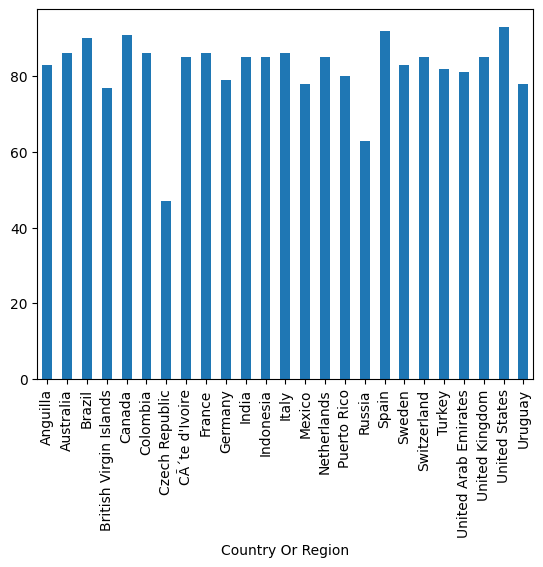

In [156]:


# importing matplotlib 
import matplotlib.pyplot 

df.plot.bar() 

## Who are the top 10 influencers in the given dataset based on the following features
# ● Followers
# ● Average likes
# ● Total Likes


# df1 = data.groupby(['Followers'])['Influence Score'].max()

# df1 = data.groupby(['Followers']).head(10)
# print(df1.shape)
# print(df1)
# print(df1['Channel Info'], df1['Influence Score'])

# df1 = data.groupby('Followers')['Influence Score'].nlargest(10)
# df1
# print(df1)

# top 10 influencers in the given dataset based the features ● Followers¶


In [157]:
df1 = data.nlargest(10, 'Followers')
## print(df1['Channel Info'], df1 ['Influence Score'])
print(df1[['Channel Info', 'Influence Score']] )

        Channel Info  Influence Score
0        \ncristiano               92
1        kyliejenner               91
2         \nleomessi               90
3      \nselenagomez               93
4          \ntherock               91
5     \narianagrande               92
6    \nkimkardashian               91
7          \nbeyonce               92
8  \nkhloekardashian               89
9     \njustinbieber               91


# top 10 influencers in the given dataset based the features ● Average likes

In [158]:
df1 = data.nlargest(10, 'Avg. Likes')
## print(df1['Channel Info'], df1 ['Influence Score'])
print(df1[['Channel Info', 'Influence Score']] )

       Channel Info  Influence Score
96            \nthv               83
131           \nj.m               83
165         \nrkive               83
0       \ncristiano               92
32   \nbillieeilish               73
1       kyliejenner               91
2        \nleomessi               90
3     \nselenagomez               93
38   \nlalalalisa_m               70
22        \nzendaya               87


# top 10 influencers in the given dataset based the features ● Total Likes

In [159]:
df1 = data.nlargest(10, 'Total Likes')
## print(df1['Channel Info'], df1 ['Influence Score'])
print(df1[['Channel Info', 'Influence Score']] )

       Channel Info  Influence Score
1       kyliejenner               91
0       \ncristiano               92
22        \nzendaya               87
6   \nkimkardashian               91
5    \narianagrande               92
25     \nbadgalriri               88
19       \nneymarjr               90
9    \njustinbieber               91
16     \nnickiminaj               90
4         \ntherock               91
